# Visualising news volume w.r.t categories

In [1]:
! pip install WordCloud
! pip install multidict

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import multidict as multidict
import regex as re
import seaborn as sns

#importing data
news_data = pd.read_csv('work\\fox_news.csv')

In [3]:
category_counts = news_data["category"].value_counts()

print(category_counts)

us                  22
media               21
entertainment       17
politics            16
sports              16
lifestyle           11
world                9
opinion              8
tech                 7
health               5
food-drink           5
personal-finance     4
weather-news         4
betting              2
travel               2
markets              2
faith-values         2
technology           1
economy              1
extreme-weather      1
Name: category, dtype: int64


## Plotting the news volume with respect to its category

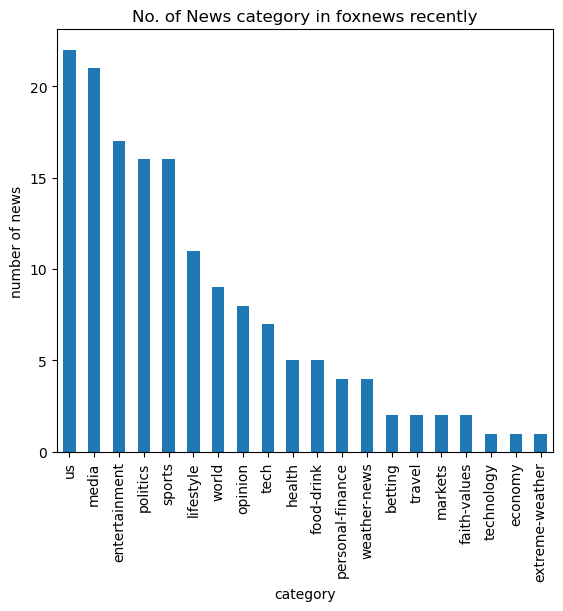

In [4]:

# category_counts is a pandas Series containing the counts of news categories

category_counts.plot(kind='bar')
plt.title("No. of News category in foxnews recently")
plt.xlabel("category")
plt.ylabel("number of news")

# Find the category with the maximum count
max_category = category_counts.idxmax()
max_count = category_counts[max_category]

# desc = f'Chart Analysis \nThe chart below depicts the information of number of news\n published recently with respect to its category. Here we can \nsee that there are maximum news related to "{max_category}". There are \n{max_count} news on this topic.'
# plt.text(0, 35, desc, ha='left', va='baseline', fontsize="large")
plt.subplots_adjust(bottom=0)
plt.show()


### defining functions for wordcloud & getting frequency

In [5]:


def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence.split(" "):
        if re.match("a|the|an|the|to|in|for|of|or|by|with|is|on|that|be", text):
            continue
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white')
    wordcloud.generate_from_frequencies(getFrequencyDictForText(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()




In [6]:
# getting category list to put in select statement
category_list = news_data['category'].unique().tolist()
print(category_list)

['politics', 'sports', 'world', 'us', 'lifestyle', 'media', 'opinion', 'technology', 'faith-values', 'health', 'travel', 'entertainment', 'markets', 'weather-news', 'betting', 'food-drink', 'tech', 'personal-finance', 'economy', 'extreme-weather']


In [7]:
selected_categories = ['economy','travel','politics']

### Visualizing wordcloud for selected category

inflation keeping fed rate cuts table analyst says jack otter barron roundtable writer nicholas jasinski discuss rate cuts looking unlikely inflation slowed expected may welcome sign federal reserve even prices remained uncomfortably high millions americans labor department wednesday consumer price index broad measure much everyday goods gasoline groceries rent cost unchanged may previous month prices climbed last year figures lower monthly increase headline gain forecast lseg data point measures underlying inflationary pressures within economy moderated last month core prices exclude volatile measurements gasoline food order better assess price growth trends increased may last year gauge climbed lowest reading since altogether report indicates inflation loosening stranglehold economy though prices remain well fed target rent prices stagnating suggesting high inflation may stick around firing hot last appears inflation engine starting cool jason pride chief investment strategy research

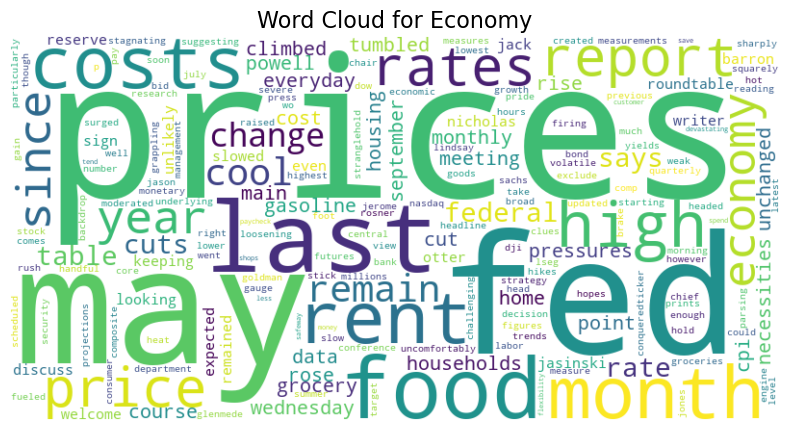

reached maximum number log create reading nothing disrupts cruise ship vacation outbreak illness taking proper preventative measures help reduce risk seafaring sickness recent report cruise ship illness approximately passengers returning cruise started feel sick nausea toward end flight last week cdc aware flight vancouver british columbia arrived houston george bush intercontinental airport friday may centers disease control prevention cdc emailed statement shared united flight cruise ship concerning conditions exposed vessel fails surprise health inspection public health officers cdc houston port health station worked ems evaluate ill passengers board among passengers airplane cruise multiple reports nothing disrupts cruise ship vacation outbreak illness taking certain preventative measures help reduce risk seafaring sickness istock precautionary measure aircraft removed service deep cleaning returning service united airlines emailed statement ill passengers reported mild gastrointes

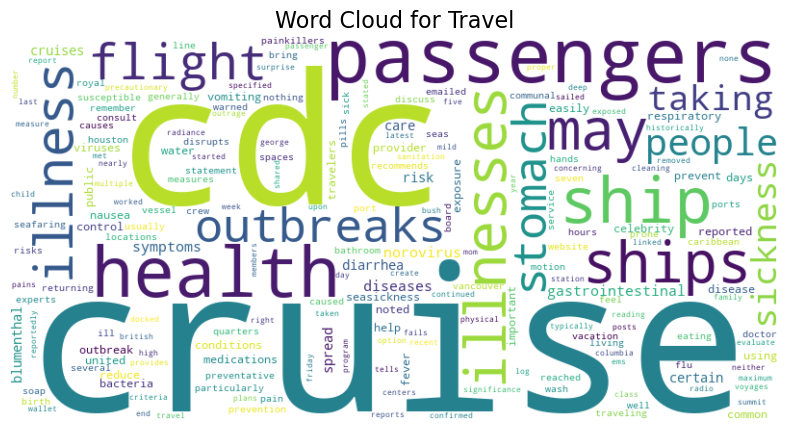

merrick garland trying blur lines legit doj criticism coercion chris landau former scalia thomas law clerk chris landau says attorney general merrick garland trying make seem doj immune criticism ingraham angle exclusive anna paulina luna vowing force vote attorney general merrick garland arrest department justice doj fails act criminal contempt resolution backed house gop leaders luna tuesday evening plan force vote inherent contempt resolution garland full house representatives weighs biden official fate separate measure right fully intend bring luna revealed really much faith department justice think american people either trying bring back level playing field show accountability way statuesque rev graham tribute comes capitol shies away limelight anna paulina luna wants force second vote whether house arrest attorney general merrick garland added doj wo jobs going inherent contempt differs contempt resolution expected come vote wednesday afternoon whereas latter refer garland depar

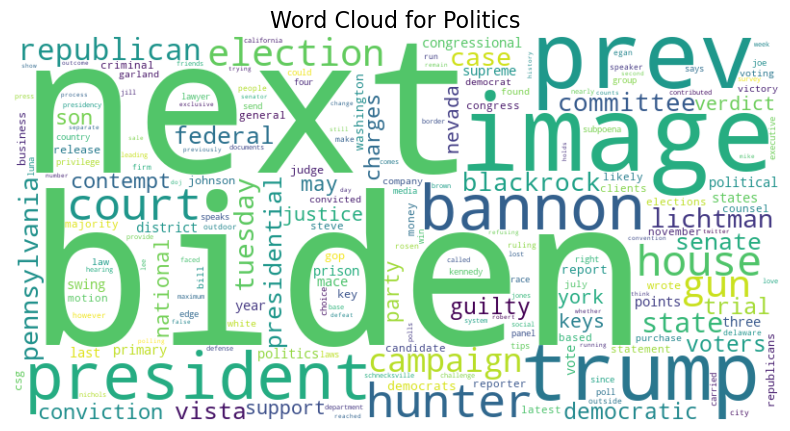

In [8]:

for category in selected_categories:
    category_text = ' '.join(news_data[news_data['category'] == category]['Corpus'].dropna())
    print(category_text)
    plot_wordcloud(category_text, f'Word Cloud for {category.capitalize()}')

# Finding most repeated words

Merging the Corpus of all news and its title into one string, tokenizing and using FreqDist to find the most used words in the news publishes recently

In [9]:
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\achar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
corpus = " ".join(news_data['Title']) + " ".join(news_data['Corpus'])
tokenized_words = word_tokenize(corpus)
frequency = FreqDist(tokenized_words)
sorted_frequency = sorted(frequency.items(), key=lambda x: x[1], reverse=True)



In [11]:
top_words = [word[0] for word in sorted_frequency[:10]]
top_freq = [word[1] for word in sorted_frequency[:10]]
print(top_words)
print(top_freq)

['biden', 'president', 'american', 'people', 'next', 'trump', 'could', 'year', 'simpson', 'may']
[320, 192, 189, 187, 182, 175, 162, 156, 151, 149]


## Plotting the chart of Most Frequent Words used in News Corpus

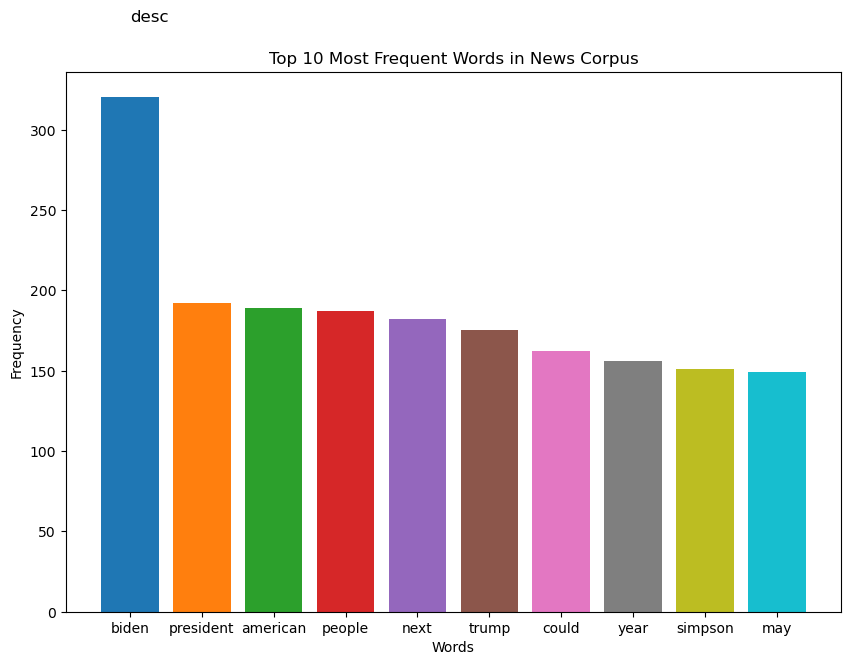

In [12]:
plt.figure(figsize=(10, 5))
colors = plt.cm.tab10(range(len(top_words)))
plt.bar(top_words, top_freq, color = colors)
plt.title('Top 10 Most Frequent Words in News Corpus')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.text(0, max(top_freq) + 50, "desc", ha='left', va='center', fontsize = "large")
plt.subplots_adjust(bottom=-0.2)
plt.show()

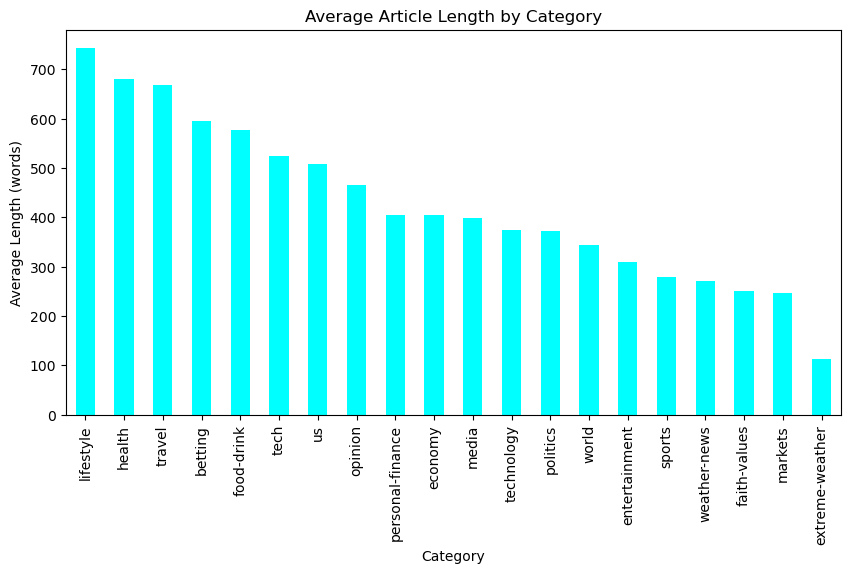

In [13]:
# Adding a column for article length
news_data['Article_Length'] = news_data['Corpus'].apply(lambda x: len(x.split()) if x else 0)

# Grouping by category and calculating the average article length
avg_length_by_category = news_data.groupby('category')['Article_Length'].mean().sort_values(ascending=False)

# Plotting the average article length by category
plt.figure(figsize=(10, 5))
avg_length_by_category.plot(kind='bar', color='cyan')
plt.title('Average Article Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Length (words)')
plt.show()


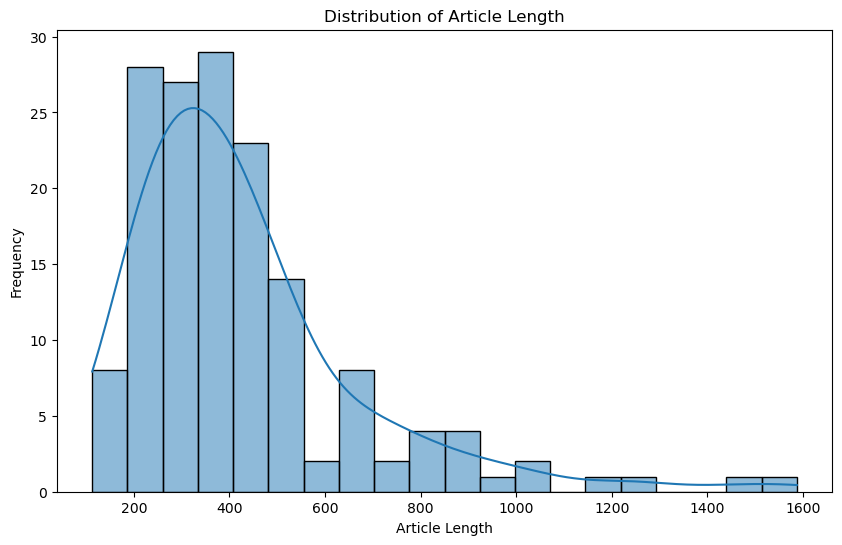

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(news_data['Article_Length'], bins=20, kde=True)
plt.title('Distribution of Article Length')
plt.xlabel('Article Length')
plt.ylabel('Frequency')
plt.show()


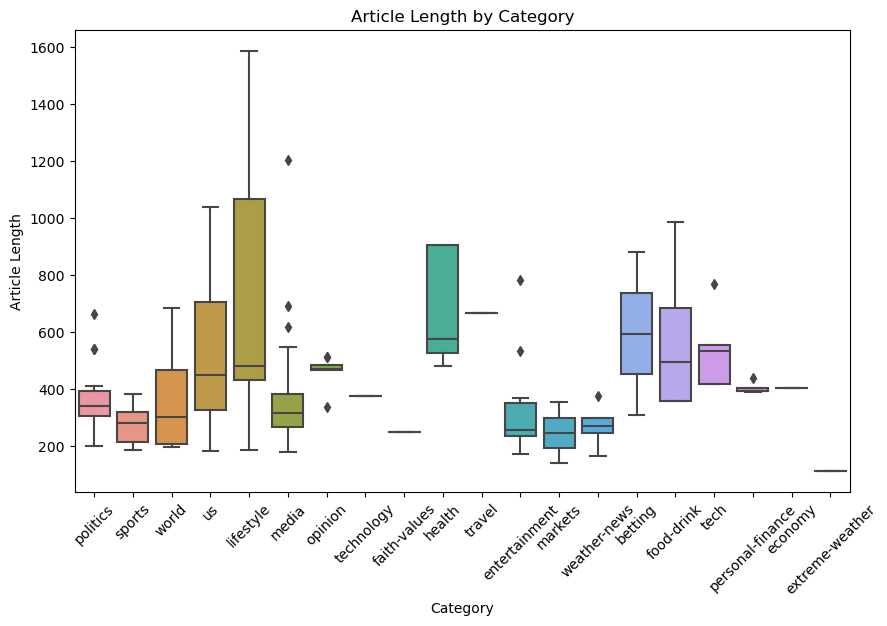

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='Article_Length', data=news_data)
plt.title('Article Length by Category')
plt.xlabel('Category')
plt.ylabel('Article Length')
plt.xticks(rotation=45)
plt.show()

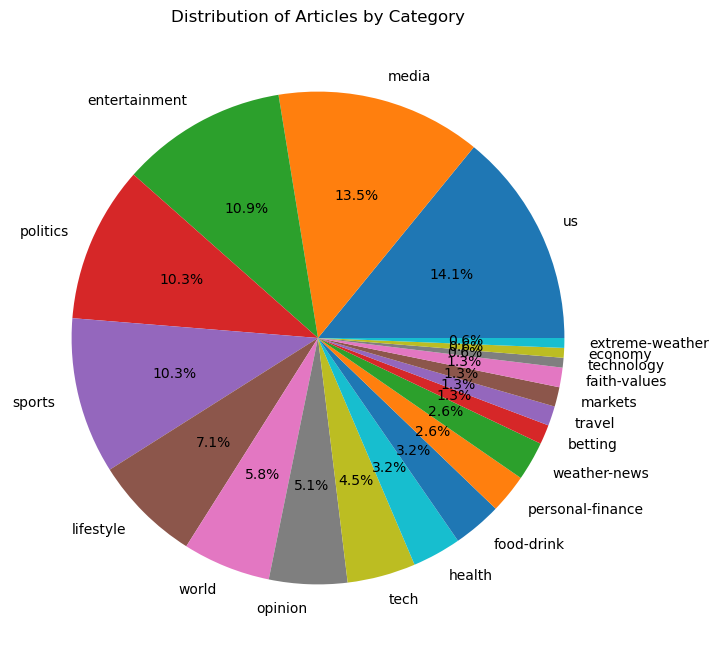

In [16]:
plt.figure(figsize=(8, 8))
news_data['category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Articles by Category')
plt.ylabel('')
plt.show()
